In [1]:
%load_ext autoreload
%autoreload 2
from equations_of_motion import NBodyPairwisePotential, HiddenNBody2DGravity, HiddenOscillators, ThreeCoupledOscillatorInit, ThreeParticlesIn2DGravity, Arbitrary2dPot, MexicanHat, VelocityPosCoupling, DrivenOsci, ThreePotentialMinima, MysteryDoubleWellInit, ParticleInComplicated2DGravity, MysteryPendulumInit, DoublePendulumInit, CoupledOscillatorInit, ParametricOsci, ParticleIn2DGravity, ParticleIn2DGravity_Circular#MysteryDoublePendulumParameters
from equations_of_motion import MysteryAsymmetricDoubleWellInit, Arbitrary1dPot, TwoParticlesIn2DGravity, ThreeParticlesIn2DGravity
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import jax
def plot_single_1d(input_dict:dict):
    for key, value in input_dict.items():
        if isinstance(value, jax.Array) and value.ndim == 1:
            ts = value
        elif isinstance(value, jax.Array) and value.ndim == 2:
            q_qdot = value
            dim = value.shape[1]
        else:
            raise ValueError(f"Field {key} is not a 1d array.")
    if dim == 2:
        # plot q vs t, ddot vs t, and q vs qdot
        fig, ax = plt.subplots(3, 1, figsize=(10, 8))
        ax[0].plot(ts, q_qdot[:, 0], label='q', color='blue')
        ax[0].set_ylabel('q')
        ax[0].set_title('q vs t')
        ax[0].set_xlabel('t')
        ax[0].legend()
        ax[1].plot(ts, q_qdot[:, 1], label='qdot', color='orange')
        ax[1].set_ylabel('qdot')
        ax[1].set_title('qdot vs t')
        ax[1].set_xlabel('t')
        ax[1].legend()
        ax[2].plot(q_qdot[:, 0], q_qdot[:, 1], label='q vs qdot', color='green')
        ax[2].set_xlabel('q')
        ax[2].set_ylabel('qdot')
        ax[2].set_title('q vs qdot')
        ax[2].legend()
    elif dim == 4:
        fig, ax = plt.subplots(3, 1, figsize=(10, 8))
        ax[0].plot(ts, q_qdot[:, 0], label='q0')
        ax[0].plot(ts, q_qdot[:, 1], label='q1')
        ax[0].set_ylabel('q')
        ax[0].set_title('q vs t')
        ax[0].set_xlabel('t')
        ax[0].legend()
        ax[1].plot(ts, q_qdot[:, 2], label='qdot0')
        ax[1].plot(ts, q_qdot[:, 3], label='qdot1')
        ax[1].set_ylabel('qdot')
        ax[1].set_title('qdot vs t')
        ax[1].set_xlabel('t')
        ax[1].legend()
        ax[2].plot(q_qdot[:, 0], q_qdot[:, 2], label='q0 vs qdot0')
        ax[2].plot(q_qdot[:, 1], q_qdot[:, 3], label='q1 vs qdot1')
        ax[2].set_xlabel('q')
        ax[2].set_ylabel('qdot')
        ax[2].set_title('q vs qdot')
        ax[2].legend()
    elif dim == 6:
        fig, ax = plt.subplots(3, 1, figsize=(10, 8))
        ax[0].plot(ts, q_qdot[:, 0], label='q0')
        ax[0].plot(ts, q_qdot[:, 1], label='q1')
        ax[0].plot(ts, q_qdot[:, 2], label='q2')
        ax[0].set_ylabel('q')
        ax[0].set_title('q vs t')
        ax[0].set_xlabel('t')
        ax[0].legend()
        ax[1].plot(ts, q_qdot[:, 3], label='qdot0')
        ax[1].plot(ts, q_qdot[:, 4], label='qdot1')
        ax[1].plot(ts, q_qdot[:, 5], label='qdot2')
        ax[1].set_ylabel('qdot')
        ax[1].set_title('qdot vs t')
        ax[1].set_xlabel('t')
        ax[1].legend()
        ax[2].plot(q_qdot[:, 0], q_qdot[:, 3], label='q0 vs qdot0')
        ax[2].plot(q_qdot[:, 1], q_qdot[:, 4], label='q1 vs qdot1')
        ax[2].plot(q_qdot[:, 2], q_qdot[:, 5], label='q2 vs qdot2')
        ax[2].set_xlabel('q')
        ax[2].set_ylabel('qdot')
        ax[2].set_title('q vs qdot')
        ax[2].legend()      
    else:
        raise NotImplementedError()
    plt.tight_layout()
    plt.show()

In [3]:
rhs = '\ndef rhs(X: jax.Array, t: float) -> jax.Array:\n    """\n    Calculates the right-hand side of the ODE for a Toda-Rayleigh system.\n    \n    The system is defined by the equations:\n    q0_ddot = (alpha - beta * q0_dot^2) * q0_dot - exp(q0 - q1)\n    q1_ddot = (alpha - beta * q1_dot^2) * q1_dot + exp(q0 - q1)\n    \n    The state vector X is [q0, q1, q0_dot, q1_dot].\n    """\n    \n    # Unpack the state vector\n    q0, q1, q0_dot, q1_dot = X\n    \n    # Parameters for the Toda-Rayleigh model\n    alpha = 0.995\n    beta = 0.495\n    \n    # Calculate the second derivatives (accelerations)\n    q0_ddot = (alpha - beta * q0_dot**2) * q0_dot - jnp.exp(q0 - q1)\n    q1_ddot = (alpha - beta * q1_dot**2) * q1_dot + jnp.exp(q0 - q1)\n    \n    # Return the derivatives of the state vector\n    return jnp.array([q0_dot, q1_dot, q0_ddot, q1_ddot])\n'

<Figure size 640x480 with 0 Axes>

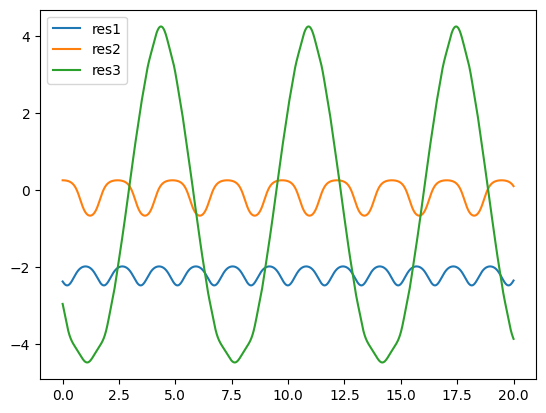

<Figure size 640x480 with 0 Axes>

In [4]:
# 1d systems
dt=0.001
solver_steps_per_timestep=10
gamma = 0.043
# Duffing oscillator
# sim = MysteryDoubleWellInit(a = 1.1321, b = -0.8123, gamma=0.043, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
# plt.figure()
# x = np.linspace(-1., 1., 400)
# plt.plot(x, sim.a* x**4 - sim.b* x**2)
#sim = MysteryPendulumInit(alpha = 1.712, omega = 1.0, gamma=0.043, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
#sim = MysteryAsymmetricDoubleWellInit(a = 1.1321, b = 0.8123, c=0.1, gamma=0.043, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
# plt.figure()
# x = np.linspace(-1., 1., 400)
# plt.plot(x, sim.a* x**4 - sim.b* x**2 - sim.c * x)
sim = Arbitrary1dPot(potential='lambda x: 0.5 * x**2 + 0.8 * jnp.sin(6*x)',
                     min_random=-3., max_random=3.,
                      dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
#sim = DrivenOsci(omega = 1.523, gamma = 0.6, epsilon = 1.7123, drive_freq = 1.551, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
#sim = ParametricOsci(omega = 1.523, gamma = 0.3, epsilon = 1.7123, drive_freq = 1.551, T=20, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

# sim = VelocityPosCoupling(a = 1.7, b = 0.4, 
#                           dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
res3 = sim.observe_random_evolution()# sim.observe_evolution(q_init=0., q_dot_init=0.0)
res2 = sim.observe_evolution(q_init=0.25, q_dot_init=0.0)
res1 = sim.observe_random_evolution()
#res1 = sim.observe_evolution(q_init=0., q_dot_init=1.0)

plt.figure()
plt.plot(res1['ts'], res1['array'][:, 0], label='res1')
plt.plot(res2['ts'], res2['array'][:, 0], label='res2')
plt.plot(res3['ts'], res3['array'][:, 0], label='res3')
plt.legend()
plt.figure()
# plot_single_1d(res2)

In [5]:
rhs="""def rhs(X,t):
    a = -0.8 * jnp.cos(6 * X[0]) * 6
    return jnp.array([X[1], a])"""
sim.save_result_find_eom(rhs)
sim.last_result

{'R2': Array(0.73673916, dtype=float32),
 'predicted_rhs': 'def rhs(X,t):\n    a = -0.8 * jnp.cos(6 * X[0]) * 6\n    return jnp.array([X[1], a])',
 'R2_list': [Array(1., dtype=float32), Array(0.47347838, dtype=float32)],
 'error': None}

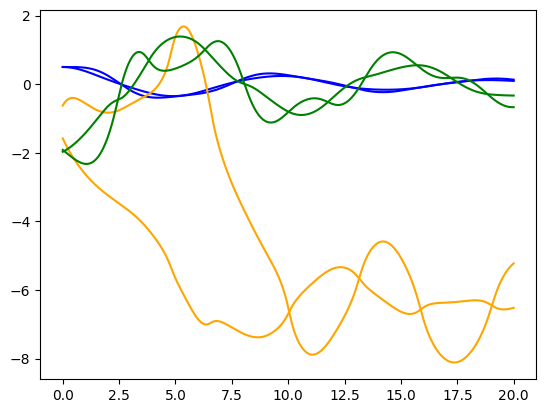

In [6]:
# 2degrees systems
dt=0.001
solver_steps_per_timestep=10
sim = DoublePendulumInit(l1 = 1.712, l2 = 0.851, gamma=0.143, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
#sim = CoupledOscillatorInit(k1 = 1.712, k2 = 0.851, kc = 0.15, gamma=0.043, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
res3 = sim.observe_random_evolution()
res2 = sim.observe_random_evolution()
res1 = sim.observe_evolution(q0=0.5, q1=0.5, q0_dot=0.0, q1_dot=0.0)

plt.figure()
plt.plot(res1['ts'], res1['array'][:, 0], label='q1', color='blue')
plt.plot(res1['ts'], res1['array'][:, 1], label='q2', color='blue')
plt.plot(res2['ts'], res2['array'][:, 0], label='q1', color='orange')
plt.plot(res2['ts'], res2['array'][:, 1], label='q2', color='orange')
plt.plot(res3['ts'], res3['array'][:, 0], label='q1', color='green')
plt.plot(res3['ts'], res3['array'][:, 1], label='q2', color='green')

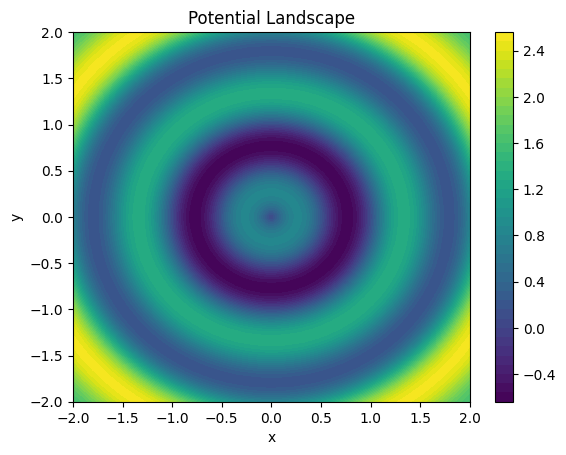

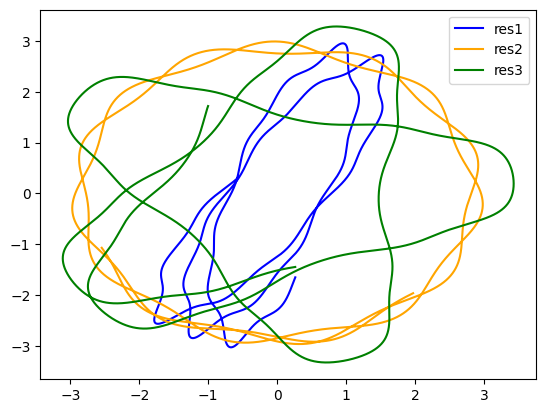

In [7]:
#2d systems (also with multiple particles)
import jax.numpy as jnp
pot = 'lambda X:  0.3 * (X[0]**2 + X[1]**2) + 0.8 * jnp.sin(6*jnp.sqrt(X[0]**2 + X[1]**2))' #lambda x: jnp.sin(x[0]**2 + x[1]**2)'
pot_func = eval(pot)
grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
pot_vals = pot_func(np.array(grid))
plt.figure()
plt.contourf(grid[0], grid[1], pot_vals, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Potential Landscape')
plt.xlabel('x')
plt.ylabel('y')
sim = Arbitrary2dPot(potential=pot, give_2d_info=True, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,
                     min_random=-3., max_random=3., seed=1)

#sim = ParticleIn2DGravity(give_2d_info=True, mass = 2.3, xp0 = -0.7, xp1 = 0.2, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

#sim = MexicanHat(give_2d_info=True, a = 2.0, b = 0.7, gamma=0.2, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

#sim = TwoParticlesIn2DGravity(mass1=8.123, mass2=0.781, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

# sim = ThreeParticlesIn2DGravity(mass1=1.3, mass2=9.0, mass3=0.2, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,
#                                 seed=1234)


res1 = sim.observe_random_evolution()
res2 = sim.observe_random_evolution()
res3 = sim.observe_random_evolution()


plt.figure()
plt.plot(res1['array'][:, 0], res1['array'][:, 1], label='res1', color='blue')
plt.plot(res2['array'][:, 0], res2['array'][:, 1], label='res2', color='orange')
plt.plot(res3['array'][:, 0], res3['array'][:, 1], label='res3', color='green')

# plt.plot(res1['array'][:, 2], res1['array'][:, 3], label='res1', color='blue')
# plt.plot(res2['array'][:, 2], res2['array'][:, 3], label='res2', color='orange')
# plt.plot(res3['array'][:, 2], res3['array'][:, 3], label='res3', color='green')

# plt.plot(res1['array'][:, 4], res1['array'][:, 5], label='res1', color='blue')
# plt.plot(res2['array'][:, 4], res2['array'][:, 5], label='res2', color='orange')
# plt.plot(res3['array'][:, 4], res3['array'][:, 5], label='res3', color='green')
plt.legend()

In [8]:
rhs="""def rhs(X,t):
    a = - 0.6 * X[0] - 0.8 * jnp.cos(6 * jnp.sqrt(X[0]**2 + X[1]**2)) * 6 * X[0] / jnp.sqrt(X[0]**2 + X[1]**2)
    b = - 0.6 * X[1] - 0.8 * jnp.cos(6 * jnp.sqrt(X[0]**2 + X[1]**2)) * 6 * X[1] / jnp.sqrt(X[0]**2 + X[1]**2)
    return jnp.array([X[2], X[3], a, b])"""
sim.save_result_find_eom(rhs)
sim.last_result

{'R2': Array(1., dtype=float32),
 'predicted_rhs': 'def rhs(X,t):\n    a = - 0.6 * X[0] - 0.8 * jnp.cos(6 * jnp.sqrt(X[0]**2 + X[1]**2)) * 6 * X[0] / jnp.sqrt(X[0]**2 + X[1]**2)\n    b = - 0.6 * X[1] - 0.8 * jnp.cos(6 * jnp.sqrt(X[0]**2 + X[1]**2)) * 6 * X[1] / jnp.sqrt(X[0]**2 + X[1]**2)\n    return jnp.array([X[2], X[3], a, b])',
 'R2_list': [Array(1., dtype=float32),
  Array(1., dtype=float32),
  Array(1., dtype=float32),
  Array(1., dtype=float32)],
 'error': None}

/var/folders/bl/g1q9c8kd65d4_zy09smb8lgdfdw6x5/T/ipykernel_37873/2379529171.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


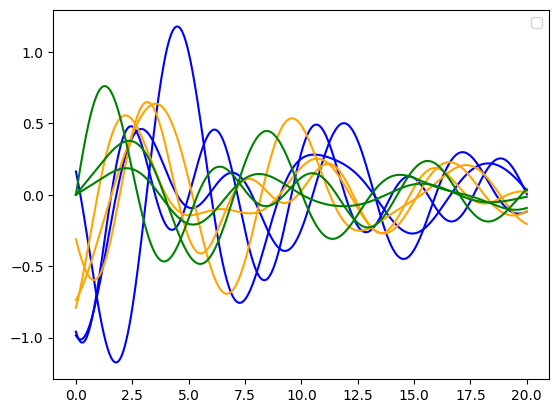

In [9]:
# 3 degrees systems
sim = ThreeCoupledOscillatorInit(k1=1.0, k2=1.5, k3=0.5, kc12=0.2, kc13=0.3, kc23=0.4, gamma=0.162, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
res1 = sim.observe_random_evolution()
res2 = sim.observe_random_evolution()
res3 = sim.observe_random_evolution()
res3 = sim.observe_evolution(q0=0., q1=0., q2=0., q0_dot=1.0, q1_dot=0.1, q2_dot=0.2)


plt.figure()
plt.plot(res1['ts'], res1['array'][:, 0], color="blue")
plt.plot(res1['ts'], res1['array'][:, 1], color="blue")
plt.plot(res1['ts'], res1['array'][:, 2], color="blue")
plt.plot(res2['ts'], res2['array'][:, 0], color="orange")
plt.plot(res2['ts'], res2['array'][:, 1], color="orange")
plt.plot(res2['ts'], res2['array'][:, 2], color="orange")
plt.plot(res3['ts'], res3['array'][:, 0], color="green")
plt.plot(res3['ts'], res3['array'][:, 1], color="green")
plt.plot(res3['ts'], res3['array'][:, 2], color="green")

plt.legend()

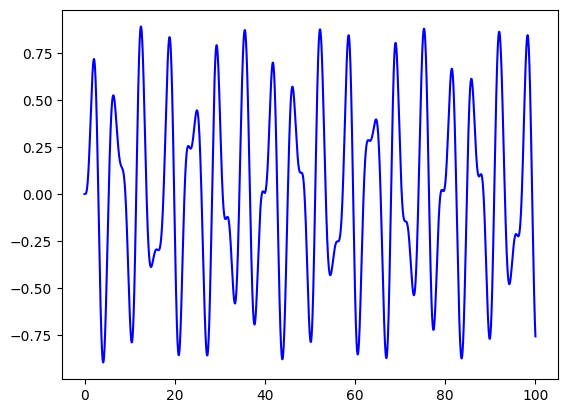

In [10]:
# hidden 1d systems
key = jax.random.PRNGKey(0)
N = 3
ks = jax.random.uniform(jax.random.PRNGKey(0), shape=(N,), minval=0.5, maxval=2.0).tolist()
kcs = jax.random.uniform(jax.random.PRNGKey(1), shape=(N,), minval=0.1, maxval=2.0).tolist()
init_pos = jax.random.uniform(jax.random.PRNGKey(2), shape=(N-1,), minval=-1.0, maxval=1.0).tolist()
init_vel = jax.random.uniform(jax.random.PRNGKey(3), shape=(N-1,), minval=-1.0, maxval=1.0).tolist()
sim = HiddenOscillators(N=N, 
                        ks = jax.random.uniform(jax.random.PRNGKey(3), shape=(N,), minval=0.5, maxval=2.0).tolist(), 
                        kcs = jax.random.uniform(jax.random.PRNGKey(2), shape=(N,), minval=0.1, maxval=2.0).tolist(), 
                        init_pos=jax.random.uniform(jax.random.PRNGKey(1), shape=(N-1,), minval=-1.0, maxval=1.0).tolist(), 
                        init_vel=jax.random.uniform(jax.random.PRNGKey(0), shape=(N-1,), minval=-1.0, maxval=1.0).tolist(),
                        hide_N=True, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep, T = 100)
# sim = HiddenOscillators(N=2, ks = [1.1, 1.54], kcs = [1.2, 0.], 
#                               init_pos=[0.4,], init_vel=[-0.2,], hide_N=True, 
#                               dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

res1 = sim.observe_evolution(q0=0., q0_dot=0.0)
# sim2 = HiddenOscillators(N=2, ks = [1.3, 1.3], kcs = [1.22, 0.], hide_N=True, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
# res2 = sim2.observe_evolution(q0=1., q0_dot=0.0)
plt.figure()
plt.plot(res1['ts'], res1['array'][:, 0], label='res1', color='blue')
#plt.plot(res2['ts'], res2['array'][:, 0], label='res2', color='orange')


(0.0, 1.0)

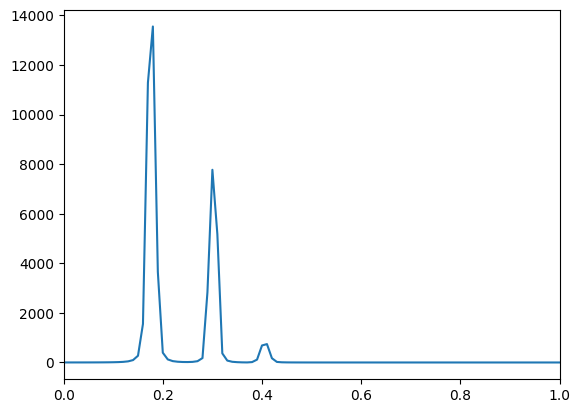

In [11]:
def spectrum(t, x):
    dt = t[1]-t[0]
    n = len(t)
    X = np.fft.rfft(x * np.hanning(n))
    freqs = np.fft.rfftfreq(n, d=dt)
    amp = np.abs(X)
    return freqs, amp
f, A = spectrum(res1['ts'],res1['array'][:, 0])

plt.plot(f, A)
plt.xlim(0, 1)


In [12]:
# sim.save_result_find_eom_hidden_degrees(f"""def rhs(X, t):
#     ks = jnp.array([1.1, 1.54])
#     kcs = jnp.array([1.2, 0.])
#     gamma = 0.
#     N = 2

#     qs = X[:2]
#     q_dots = X[2:]

#     # Forces due to spring + damping
#     forces = -ks * qs - gamma * q_dots

#     # Coupling forces
#     left = jnp.roll(qs, 1)  # periodic left neighbor
#     right = jnp.roll(qs, -1)  # periodic right neighbor
#     coupling = kcs * (right - qs) + jnp.roll(kcs, 1) * (left - qs)

#     forces += coupling

#     return jnp.concatenate([q_dots, forces])
# """, hidden_initial_qs='[0.4,]', hidden_initial_q_dots='[-0.2,]')
# import multiprocessing
# def one_run():
#     sim.save_result_find_eom_hidden_degrees("import jax.numpy as jnp\n\ndef rhs(X: jnp.array, t: float) -> jnp.array:\n    # X = [q0,q1,q2,q3,q4, q0_dot,q1_dot,q2_dot,q3_dot,q4_dot]\n    q0, q1, q2, q3, q4, v0, v1, v2, v3, v4 = X\n    # Linear 5-mass chain with identical masses m=1\n    # On-site spring k0 for every mass\n    # Nearest-neighbor coupling springs of stiffness k_c\n    # Wall springs at both ends of stiffness k_w\n    k_c = 0.03564018\n    k0  = 0.03123259\n    k_w = 0.02180171\n\n    # Accelerations a_i = -K q with boundary terms\n    a0 = -k0*q0 - k_w*q0 - k_c*(q0 - q1)\n    a1 = -k0*q1 - k_c*(2.0*q1 - q0 - q2)\n    a2 = -k0*q2 - k_c*(2.0*q2 - q1 - q3)\n    a3 = -k0*q3 - k_c*(2.0*q3 - q2 - q4)\n    a4 = -k0*q4 - k_w*q4 - k_c*(q4 - q3)\n\n    return jnp.array([v0, v1, v2, v3, v4, a0, a1, a2, a3, a4])",
#                                         hidden_initial_qs='[0.13957326, -0.10667358, 0.20447240, -0.04913238]', hidden_initial_q_dots='[0.11594368, -0.09934816, 0.04751211, -0.02065634]')
# with multiprocessing.Pool(processes=1) as p:
#     results = p.map(one_run, range(1))
# sim.save_result_find_eom_hidden_degrees("import jax.numpy as jnp\n\ndef rhs(X: jnp.array, t: float) -> jnp.array:\n    # X = [q0,q1,q2,q3,q4, q0_dot,q1_dot,q2_dot,q3_dot,q4_dot]\n    q0, q1, q2, q3, q4, v0, v1, v2, v3, v4 = X\n    # Linear 5-mass chain with identical masses m=1\n    # On-site spring k0 for every mass\n    # Nearest-neighbor coupling springs of stiffness k_c\n    # Wall springs at both ends of stiffness k_w\n    k_c = 0.03564018\n    k0  = 0.03123259\n    k_w = 0.02180171\n\n    # Accelerations a_i = -K q with boundary terms\n    a0 = -k0*q0 - k_w*q0 - k_c*(q0 - q1)\n    a1 = -k0*q1 - k_c*(2.0*q1 - q0 - q2)\n    a2 = -k0*q2 - k_c*(2.0*q2 - q1 - q3)\n    a3 = -k0*q3 - k_c*(2.0*q3 - q2 - q4)\n    a4 = -k0*q4 - k_w*q4 - k_c*(q4 - q3)\n\n    return jnp.array([v0, v1, v2, v3, v4, a0, a1, a2, a3, a4])",
#                                         hidden_initial_qs='[0.13957326, -0.10667358, 0.20447240, -0.04913238]', hidden_initial_q_dots='[0.11594368, -0.09934816, 0.04751211, -0.02065634]')
# print(sim.last_result)

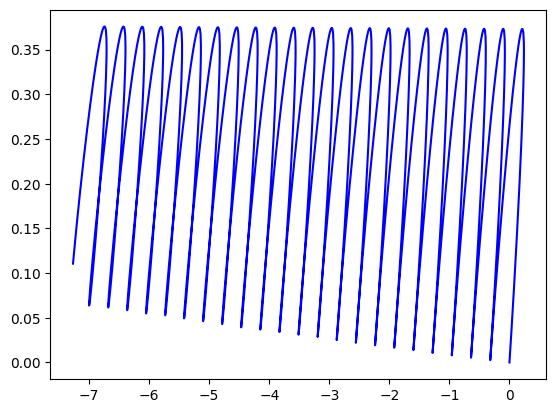

In [13]:
# hidden 2d systems
#sim = HiddenNBody2DGravity(N=2, masses = [0.7, 1.8,], hidden_init = [0.5, 0.5, -0.5, 0.], hide_N=False, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)
sim = HiddenNBody2DGravity(N=2, masses = [0.7, 1.8,], hidden_init = [0.5, 0.5, -0.5, 0.], hide_N=False, dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

res1 = sim.observe_evolution(x1=0., y1=0., vx1=0.0, vy1=0.0)
plt.figure()
plt.plot(res1['array'][:, 0], res1['array'][:, 1], label='res1', color='blue')

In [14]:
print('import jax.numpy as jnp\n\ndef rhs(X: jnp.array, t: float) -> jnp.array:\n    # X = [x1, y1, x2, y2, vx1, vy1, vx2, vy2]\n    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = X\n    # Two-body attractive inverse-square interaction\n    # Acceleration on 1 due to 2 has strength k2, and on 2 due to 1 has strength k1.\n    # Numerical estimates from data: k2 ~ 2.0; k1 chosen comparable (two-body gravity form).\n    k1 = 2.0  # G*m1\n    k2 = 2.0  # G*m2\n    rx = x2 - x1\n    ry = y2 - y1\n    r2 = rx * rx + ry * ry + 1e-6\n    invr3 = 1.0 / jnp.power(r2, 1.5)\n    ax1 = k2 * rx * invr3\n    ay1 = k2 * ry * invr3\n    ax2 = -k1 * rx * invr3\n    ay2 = -k1 * ry * invr3\n    return jnp.array([vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2])\n')

import jax.numpy as jnp

def rhs(X: jnp.array, t: float) -> jnp.array:
    # X = [x1, y1, x2, y2, vx1, vy1, vx2, vy2]
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = X
    # Two-body attractive inverse-square interaction
    # Acceleration on 1 due to 2 has strength k2, and on 2 due to 1 has strength k1.
    # Numerical estimates from data: k2 ~ 2.0; k1 chosen comparable (two-body gravity form).
    k1 = 2.0  # G*m1
    k2 = 2.0  # G*m2
    rx = x2 - x1
    ry = y2 - y1
    r2 = rx * rx + ry * ry + 1e-6
    invr3 = 1.0 / jnp.power(r2, 1.5)
    ax1 = k2 * rx * invr3
    ay1 = k2 * ry * invr3
    ax2 = -k1 * rx * invr3
    ay2 = -k1 * ry * invr3
    return jnp.array([vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2])



In [15]:
sim = NBodyPairwisePotential (N=5, potential_str = 'lambda r: - 0.8 * jnp.exp(-1.3*r)', dt=dt, solver_steps_per_timestep=solver_steps_per_timestep,)

In [16]:
res = sim.observe_evolution('[0.5, 0.1, -0.3, 0.4, 0.2]', '[0.0, -0.4, 0.3, 0.1, -0.2]', '[0.0, 0.0, 0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0, 0.0, 0.0]')

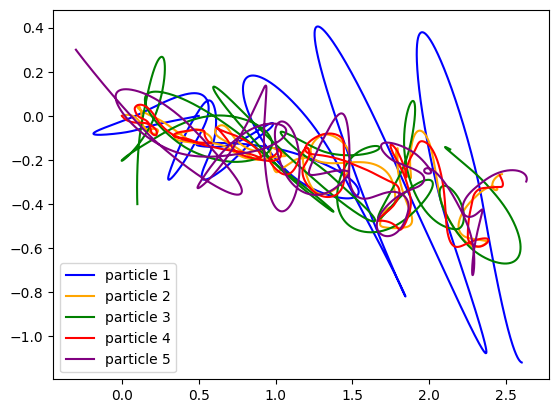

In [17]:
plt.plot(res['array'][:, 0], res['array'][:, 1], label='particle 1', color='blue')
plt.plot(res['array'][:, 2], res['array'][:, 3], label='particle 2', color='orange')
plt.plot(res['array'][:, 4], res['array'][:, 5], label='particle 3', color='green')
plt.plot(res['array'][:, 6], res['array'][:, 7], label='particle 4', color='red')
plt.plot(res['array'][:, 8], res['array'][:, 9], label='particle 5', color='purple')
plt.legend()